In [1]:
from astropy.io import fits
import os
from pathlib import Path
import random
import pandas as pd

In [2]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

In [4]:
DES_DIR = Path(
    "/nfs/turbo/lsa-regier/scratch/gapatron/desdr-server.ncsa.illinois.edu/despublic/dr2_tiles/"
)
DES_SUBDIR = os.listdir(DES_DIR)[0]
DES_SUBDIR

'DES0053-2041'

In [18]:
image_des_r = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_r_nobkg.fits.fz")
image_des_g = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_g_nobkg.fits.fz")
image_des_i = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_i_nobkg.fits.fz")

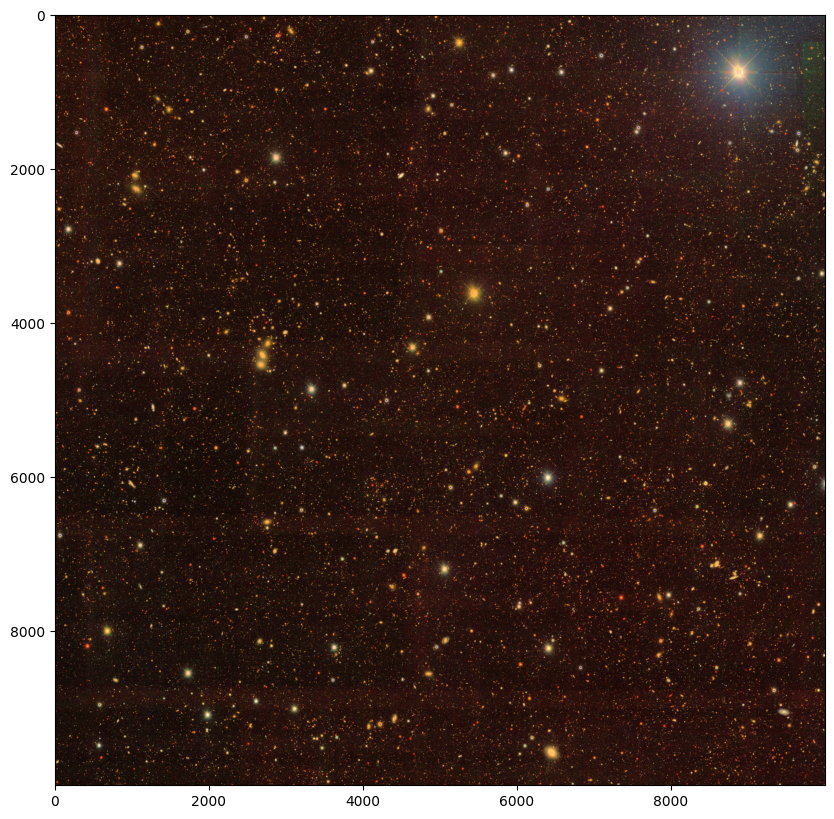

In [6]:
rgb_default = make_lupton_rgb(image_des_i, image_des_r, image_des_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [7]:
main_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_main.fits")
flux_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_flux.fits")
main_data = fits.getdata(main_path)
main_df = pd.DataFrame(main_data)
flux_data = fits.getdata(flux_path)
flux_df = pd.DataFrame(flux_data)
full_df = pd.merge(
    main_df, flux_df, left_on="COADD_OBJECT_ID", right_on="COADD_OBJECT_ID", how="left"
)
full_df

,COADD_OBJECT_ID,TILENAME_x,HPIX_32_x,HPIX_64_x,HPIX_1024_x,HPIX_4096_x,HPIX_16384_x,RA_x,DEC_x,ALPHAWIN_J2000_x,...,WAVG_FLUX_PSF_G_y,WAVG_FLUX_PSF_R_y,WAVG_FLUX_PSF_I_y,WAVG_FLUX_PSF_Z_y,WAVG_FLUX_PSF_Y_y,WAVG_FLUXERR_PSF_G_y,WAVG_FLUXERR_PSF_R_y,WAVG_FLUXERR_PSF_I_y,WAVG_FLUXERR_PSF_Z_y,WAVG_FLUXERR_PSF_Y_y
0,1116571654,DES0053-2041,4184,16738,4285105,68561695,1096987124,13.056454,-20.636724,13.056454,...,683.319519,1034.024658,1074.685059,1274.979126,1788.725464,17.636053,26.291019,29.024097,78.832764,423.940491
1,1116567053,DES0053-2041,4184,16738,4285110,68561763,1096988215,13.056469,-20.591304,13.056469,...,196.368149,197.250748,inf,inf,inf,22.516487,26.343719,-inf,-inf,-inf
2,1116543981,DES0053-2041,4186,16744,4286529,68584467,1097351479,13.056481,-20.351949,13.056481,...,157.072952,264.076660,inf,inf,inf,29.190136,43.607346,-inf,-inf,-inf
3,1116597552,DES0053-2041,4184,16738,4285062,68560998,1096975978,13.056710,-20.901850,13.056710,...,289.712646,487.127411,661.900085,968.955444,inf,16.565157,19.728464,30.193422,148.572327,-inf
4,1116571115,DES0053-2041,4184,16738,4285105,68561695,1096987127,13.056740,-20.631263,13.056740,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68514,1116586837,DES0053-2041,4184,16738,4285016,68560260,1096964163,13.819443,-20.795595,13.819443,...,503.728577,1033.314819,1539.083008,1711.154541,1823.136597,15.880844,18.505005,33.255836,63.121899,302.682404
68515,1116551610,DES0053-2041,4184,16739,4285225,68563608,1097017737,13.819464,-20.432428,13.819464,...,inf,239.209259,inf,inf,inf,-inf,42.199951,-inf,-inf,-inf
68516,1116554525,DES0053-2041,4184,16739,4285224,68563590,1097017445,13.819506,-20.463666,13.819506,...,312.310242,524.127136,665.805786,916.527161,inf,15.840570,17.033678,32.626961,114.220909,-inf
68517,1116556727,DES0053-2041,4184,16739,4285218,68563499,1097015999,13.819511,-20.486442,13.819511,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf


In [8]:
import numpy as np

In [11]:
fluxes = np.array(
            full_df[
                [
                    "FLUX_AUTO_G_x",
                    "FLUX_AUTO_R_x",
                    "FLUX_AUTO_I_x",
                    "FLUX_AUTO_Z_x",
                    "FLUX_AUTO_Y_x",
                ]
            ]
        )

fluxes *= (fluxes > 0)

hlrs = 0.263 * np.array(full_df["FLUX_RADIUS_R"])
hlrs = 1e-4 + hlrs * (hlrs > 0)
a = np.array(full_df["A_IMAGE"])
b = np.array(full_df["B_IMAGE"])
g = (a - b) / (a + b)
angle = np.arctan(b / a)
g1 = g * np.cos(angle)
g2 = g * np.sin(angle)


In [13]:
mock_catalog = pd.DataFrame()
mock_catalog["RA"] = np.array(full_df["ALPHAWIN_J2000_x"])
mock_catalog["DEC"] = np.array(full_df["DEC_x"])
mock_catalog["X"] = np.array(full_df["XWIN_IMAGE_R"])
mock_catalog["Y"] = np.array(full_df["YWIN_IMAGE_R"])
mock_catalog["MEM"] = 0
mock_catalog["FLUX_R"] = fluxes[:, 1]
mock_catalog["FLUX_G"] = fluxes[:, 0]
mock_catalog["FLUX_I"] = fluxes[:, 2]
mock_catalog["FLUX_Z"] = fluxes[:, 3]
mock_catalog["FLUX_Y"] = fluxes[:, 4]
mock_catalog["HLR"] = hlrs
mock_catalog["FRACDEV"] = 0
mock_catalog["G1"] = g1
mock_catalog["G2"] = g2
mock_catalog["Z"] = 0
mock_catalog["SOURCE_TYPE"] = 0

In [14]:
from astropy.io import ascii as astro_ascii
from astropy.table import Table

DATA_PATH = "/home/kapnadak/bliss/case_studies/galaxy_clustering/data"
CATALOG_PATH = os.path.join(DATA_PATH, "catalogs")

file_name = f"{CATALOG_PATH}/galsim_des_000.dat"
catalog_table = Table.from_pandas(mock_catalog)
astro_ascii.write(catalog_table, file_name, format="no_header", overwrite=True)

In [16]:
image_galsim_r = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_r.fits")
image_galsim_g = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_g.fits")
image_galsim_i = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_000_i.fits")

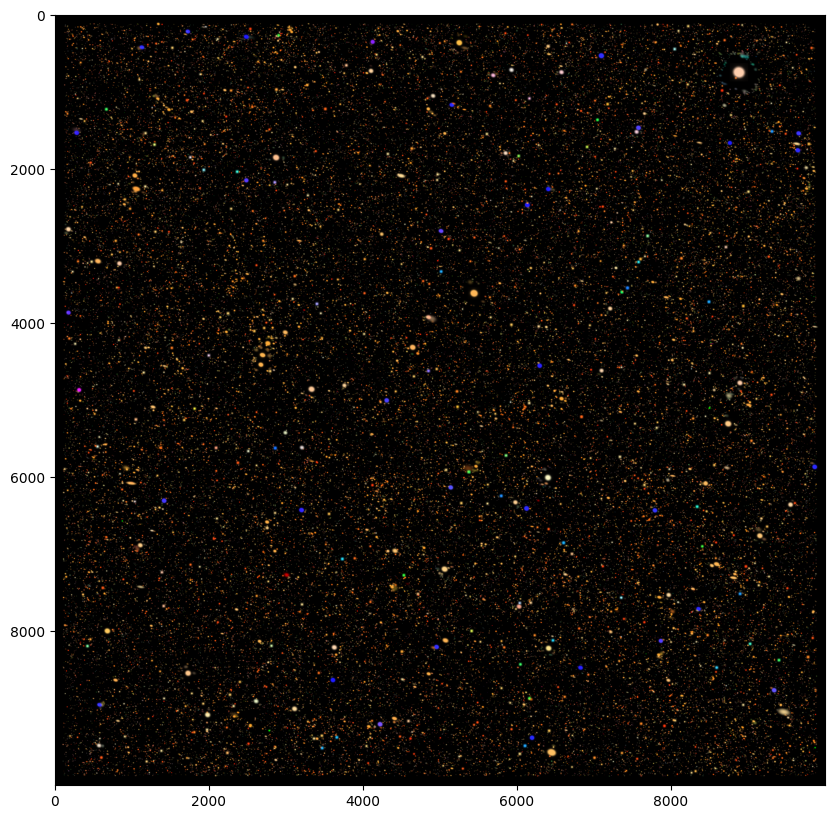

In [17]:
rgb_default = make_lupton_rgb(image_galsim_i, image_galsim_r, image_galsim_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [19]:
residual_r = image_des_r - image_galsim_r
residual_g = image_des_g - image_galsim_g
residual_i = image_des_i - image_galsim_i

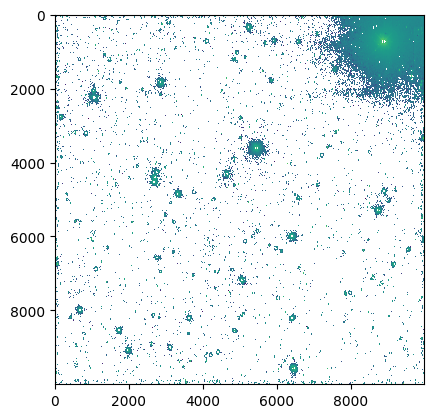

In [20]:
plt.imshow(residual_r, norm=LogNorm())